In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import hvplot.pandas


In [5]:
fire_data_path = "resources/NFDB_point_20220901.txt"
fire_data_df = pd.read_csv(fire_data_path, dtype={'FID': 'Int64',
                                                 'SRC_AGENCY': 'string',
                                                 'FIRE_ID':'string',
                                                 'FIRENAME':'string',
                                                 'LATITUDE':'Float64',
                                                 'LONGITUDE':'Float64',
                                                 'YEAR':'Int64',
                                                 'MONTH':'Int64',
                                                 'DAY': 'Int64',
                                                 'REP_DAT': 'string',
                                                 'ATTK_DATE':'string',
                                                 'OUT_DATE':'string',
                                                 'DECADE': 'string',
                                                 'SIZE_HA':'Float64',
                                                 'CAUSE':'string',
                                                 'PROTZONE':'string',
                                                 'FIRE_TYPE':'string',
                                                 'MORE_INFO':'string',
                                                 'CFS_REF_ID':'string',
                                                 'CFS_NOTE1':'string',
                                                 'CFS_NOTE2':'string',
                                                 'ACQ_DATE':'string',
                                                 'SRC_AGY2':'string',
                                                 'ECOZONE':'Int64',
                                                 'ECOZ_REF':'string',
                                                 'ECOZ_NAME':'string',
                                                 'ECOZ_NOM':'string'})

In [6]:
fire_data_df['Sqr_Kilometers']=fire_data_df['SIZE_HA']/100
summary_fire_df=fire_data_df[fire_data_df['YEAR']>=1960].groupby(['YEAR']).agg({'Sqr_Kilometers':'sum', 'FID':'count'})

summary_fire_df

,Sqr_Kilometers,FID
YEAR,,
1960,5978.412269,2856
1961,27780.956071,4219
1962,3251.29082,1957
1963,1748.763069,3047
1964,11389.305676,1712
...,...,...
2017,35894.232611,5654
2018,23288.435642,7103
2019,17862.002172,4059


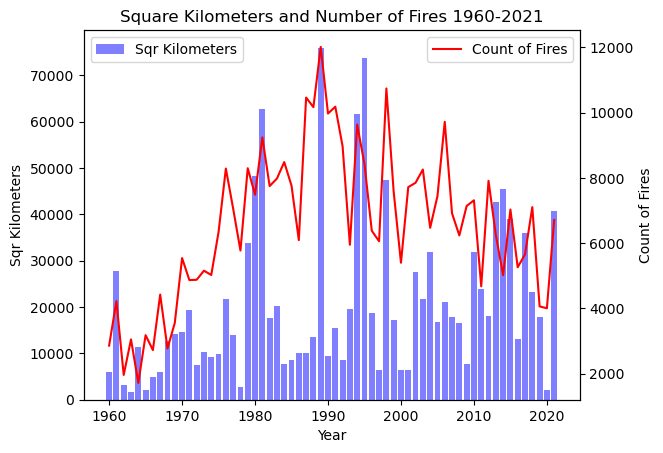

In [7]:
fig, ax = plt.subplots()
# figsize=
ax2 = ax.twinx()
ax.bar(summary_fire_df.index,summary_fire_df['Sqr_Kilometers'], color='blue', alpha=0.50)
ax2.plot(summary_fire_df.index, summary_fire_df['FID'], color='r')
ax.set_ylabel('Sqr Kilometers')
ax2.set_ylabel('Count of Fires')
ax.set_xlabel('Year')
ax.legend(['Sqr Kilometers'], loc='upper left')
ax2.legend(['Count of Fires'], loc='upper right')
plt.title('Square Kilometers and Number of Fires 1960-2021')
# ax2.legend(['Count of Fires'])
# summary_fire_df.loc[1980:2021]['FID'].plot(kind='line')
plt.show()

In [8]:
for year in 1960, 2021:
#     plot_data_df= fire_data_df.loc[(fire_data_df['YEAR']==year) & (fire_data_df['MONTH']==6) & (fire_data_df['SIZE_HA']>100)]
    plot_data_df= fire_data_df.loc[(fire_data_df['YEAR']==year) & (fire_data_df['MONTH']==6) & (fire_data_df['Sqr_Kilometers']>0)]
    plot_data_df
    map_plot_1 = plot_data_df.hvplot.points(
        "LONGITUDE",
        "LATITUDE",        
        geo = True,
        tiles = "OSM",
        s = 'Sqr_Kilometers',
        ylabel='LATITUDE',
        xlabel='LONGITUDE',
        legend= 'right',
        c = 'Sqr_Kilometers',
        hover_cols = (['FIRENAME', 'SRC_AGENCY']), 
        color = 'r',
        fill_alpha = .1,
        xlim=(-145,-50),
        ylim=(42,72),
        width = 1000,
        height=550,
        title='Square Kilometers Burned'
    )
#     map_plot_1
map_plot_1

C:\Users\johna\anaconda3\envs\dev\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [LONGITUDE,LATITUDE]   (Sqr_Kilometers,FIRENAME,SRC_AGENCY)

In [9]:
fire_data_df

,FID,SRC_AGENCY,FIRE_ID,FIRENAME,LATITUDE,LONGITUDE,YEAR,MONTH,DAY,REP_DATE,...,CFS_REF_ID,CFS_NOTE1,CFS_NOTE2,ACQ_DATE,SRC_AGY2,ECOZONE,ECOZ_REF,ECOZ_NAME,ECOZ_NOM,Sqr_Kilometers
0,0,BC,1953-G00041,,59.963,-128.172,1953,5,26,1953-05-26 00:00:00,...,BC-1953-1953-G00041,,,2020-05-05 00:00:00,BC,12,12,Boreal Cordillera,CordillCre boreale,0.08
1,1,BC,1950-R00028,,59.318,-132.172,1950,6,22,1950-06-22 00:00:00,...,BC-1950-1950-R00028,,,2020-05-05 00:00:00,BC,12,12,Boreal Cordillera,CordillCre boreale,0.08
2,2,BC,1950-G00026,,59.876,-131.922,1950,6,4,1950-06-04 00:00:00,...,BC-1950-1950-G00026,,,2020-05-05 00:00:00,BC,12,12,Boreal Cordillera,CordillCre boreale,129.499
3,3,BC,1951-R00097,,59.76,-132.808,1951,7,15,1951-07-15 00:00:00,...,BC-1951-1951-R00097,,,2020-05-05 00:00:00,BC,12,12,Boreal Cordillera,CordillCre boreale,2.411
4,4,BC,1952-G00116,,59.434,-126.172,1952,6,12,1952-06-12 00:00:00,...,BC-1952-1952-G00116,,,2020-05-05 00:00:00,BC,12,12,Boreal Cordillera,CordillCre boreale,0.012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423826,423826,PC-WB,2021WB003,21WB003,59.61015,-113.985117,2021,7,8,2021-07-08 00:00:00,...,PC-WB-2021-2021WB003,,,2022-03-21 00:00:00,PC,4,4,Taiga Plain,Taiga des plaines,0.651
423827,423827,PC-WL,2021WL001,Y-camp guard (Maskinonge),49.1112,-113.836,2021,3,4,2021-03-04 00:00:00,...,PC-WL-2021-2021WL001,,,2022-03-21 00:00:00,PC,14,14,Montane Cordillera,Cordill re montagnarde,0.076
423828,423828,PC-WL,2021WL002,Y-camp guard (Maskinonge 2),49.1122,-113.8405,2021,3,17,2021-03-17 00:00:00,...,PC-WL-2021-2021WL002,,,2022-03-21 00:00:00,PC,14,14,Montane Cordillera,Cordill re montagnarde,0.029
423829,423829,PC-WL,2021WL003,Bertha trailhead powerline,49.0463,-113.9163,2021,9,18,2021-09-18 00:00:00,...,PC-WL-2021-2021WL003,,,2022-03-21 00:00:00,PC,14,14,Montane Cordillera,Cordill re montagnarde,0.000001
